# Deep Learning Keras

## Imports

In [1]:
# importando o tensorflow e o keras
import tensorflow
from tensorflow import keras
# Importando o matplotlib para plotar as imagens
import matplotlib.pyplot as plt

import numpy as np

## Carregando o Dataset

In [2]:
# Acessar dataset disponivel dentro do keras
# O dataset contem 70 mil imagens, portanto 60 mil é de treino e 10 mil é de teste
dataset = keras.datasets.fashion_mnist

In [3]:
# Carregar o dataset
# Ao carregar o DataSet, o retorno é duas tuplas, onde a primeira contem imagens e identificações de treino (x,y)
# e o segundo contem imagens e identificações de teste (x,y)
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

## Exploração dos dados

In [4]:
# Podemos analisar a dimensão do nosso array com o shape
# Formato do array
# Temos 60000 registro de array de 28 linhas 28 coluna
imagens_treino.shape

(60000, 28, 28)

In [5]:
# Temos 10000 registro de array de 28 linhas 28 coluna
# Imagens de treino
imagens_teste.shape

(10000, 28, 28)

In [6]:
print('Labels de treino: ', len(identificacoes_treino),'Labels de Teste: ', len(identificacoes_teste))

Labels de treino:  60000 Labels de Teste:  10000


In [7]:
# A identificação minima 
identificacoes_treino.min()

0

In [8]:
# A identificação maxima
identificacoes_treino.max()

9

## Exibição dos dados

In [9]:
total_de_classificadores = 10
# Mapear os classificadores de 0 a 9 por nomes
# https://github.com/zalandoresearch/fashion-mnist
nomes_de_classificadores = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 
                            'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

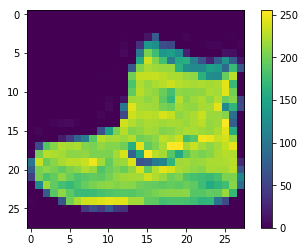

In [10]:
'''
for imagem in range(10):
#     Configurando o sub plot para exibir 2 linha e 5 colunas de imagens
    plt.subplot(2,5,imagem+1)
    # Platando a primeira imagem de index[0]
    plt.imshow(imagens_treino[imagem])
    # Adicionando um titulo a img
    plt.title(nomes_de_classificadores[identificacoes_treino[imagem]])
'''

# Podemos plotar uma barra de cores para identificar a gradação das cores
plt.imshow(imagens_treino[0])
plt.colorbar()

Link para scipy img, lib para manipular imagens
http://scipy-lectures.org/advanced/image_processing/

In [27]:
# Camadas do modelo
# modelo sequencial
#     entrada
#     processamento
#     saida

# NORMALIZAÇÃO DAS IMAGENS
# Dimunindo o processamento de pixels de 255 para 0 a 1. A rede não precisa processar 255 pixels e sim de 0 a 1 
# com suas diferença, ou seja, 0.10, 0.30,1, etc
imagens_treino = imagens_treino / float(255)

# Definindo um modelo sequencial, onde temos a entrada, processamento e saida dos dados
modelo = keras.Sequential([
#   Camanda de entrada
#   Na priemira camada, vamos pegar as imagens de 28x28 e achatar para um unico array de 784(28x28) posições
    keras.layers.Flatten(input_shape = (28,28)),
#   CAMADAS OCULTAS, porque não é possivel saber o que esta acontencendo para realizar o agrupamento 
#   dos neuronios.
#   Camada de processamento
#   Criando 256 camandas "bolinhas" que vão ser densar e comunicar com a camada de Flatten, ou seja
#   a camada com a imagem em um unico array de pixels
#   Alem de termos 256(Recomendado multiplos de 2. Temos que testar o que é melhor para o que queremos)
#   pequenos tensores, temos dizer quando eles vão ser ativados, 
#   que é o relu, uma ativação de redes mais utilizada na comunidade
#   reLU = Unidade linear retificada
#   AS CAMADAS OCULTAS TEM QUE SER TESTADA PARA CHEGAR NA MENOR PERDA(LOSS)
#   A EXECUÇÃO DA COMPILAÇÃO ARMAZENA ALGUMAS VARIAVEIS DE ESTADO DO MODELO E O JUPYTER TAMBEM ARMAZEMA
#   O QUE FAZ COM QUE O MODELO GERE SEMPRE O MESMO RESULTADO, PARA ISSO TEMOS QUE RESTARTAR O NOTEBOOK
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
#     keras.layers.Dense(128, activation=tensorflow.nn.relu),
#     keras.layers.Dense(64, activation=tensorflow.nn.relu),
#   Camada de Saida
#   O numero da camada de saída é a quantidade de classificações que o modelo vai conter
#   O softmax é uma função que extrai da imagem probabilidades em % de todas outras imagens 
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#Compinando o modelo antes de treinar
modelo.compile(
    # Otimizador de treinamento da rede
    optimizer='adam',
    # Perda de informação da rede. Se a rede classificar um item errado, ela vai ter uma perda de informação
    # para calcular a perda, vamos utilizar a "entropia categorica cruzada esparsa" 
    loss='sparse_categorical_crossentropy',
    # Adicionando métricas para identificar o quanto o modelo esta acertando
    metrics=['accuracy'])

# Treinando um modelo
# epoch é a quantidade de vezes que o modelo vai ser treinado
# validation_split é a quantidade de registro que vamos usar para validar o desempenho, 0.2 = 20%
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 192us/sample - loss: 2.3028 - acc: 0.1005 - val_loss: 2.3026 - val_acc: 0.0983
Epoch 2/10
48000/48000 [==============================] - 9s 194us/sample - loss: 2.3022 - acc: 0.1017 - val_loss: 2.3017 - val_acc: 0.1003
Epoch 3/10
48000/48000 [==============================] - 8s 168us/sample - loss: 2.3009 - acc: 0.1146 - val_loss: 2.2998 - val_acc: 0.1942
Epoch 4/10
48000/48000 [==============================] - 8s 161us/sample - loss: 2.2979 - acc: 0.1571 - val_loss: 2.2958 - val_acc: 0.1217
Epoch 5/10
48000/48000 [==============================] - 9s 181us/sample - loss: 2.2920 - acc: 0.1591 - val_loss: 2.2878 - val_acc: 0.1526
Epoch 6/10
48000/48000 [==============================] - 9s 193us/sample - loss: 2.2829 - acc: 0.1791 - val_loss: 2.2770 - val_acc: 0.1898
Epoch 7/10
48000/48000 [==============================] - 9s 179us/sample - loss: 2.2711 - acc: 0.2005 - val_l

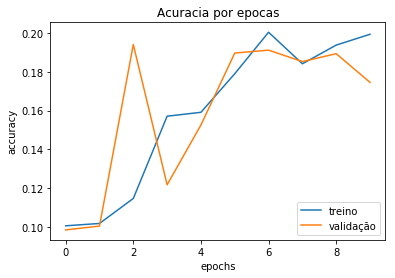

In [28]:
# Salvamos o historico de treinamento do modelo para plotar um grafico com os resultados
# PLOTANDO GRAFICO DE DESEMPENHO DO MODELO
# Plotando dois array de dados
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
# Configurando titulo do grafico
plt.title('Acuracia por epocas')
# label do eixo x
plt.xlabel('epochs')
# label do eixo y
plt.ylabel('accuracy')
# Adicionando legendas
plt.legend(['treino', 'validação'])

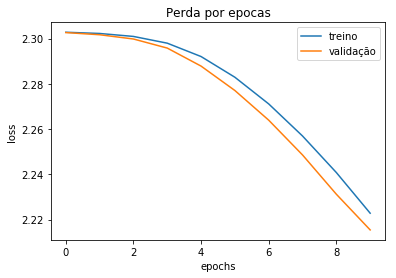

In [29]:
# PLOTANDO GRAFICO DE PERDA DO MODELO
# Plotando dois array de dados
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
# Configurando titulo do grafico
plt.title('Perda por epocas')
# label do eixo x
plt.xlabel('epochs')
# label do eixo y
plt.ylabel('loss')
# Adicionando legendas
plt.legend(['treino', 'validação'])

### Exemplo de comunicação das camandas feita pela camada Dense
<img src="./dense.png">

### Exemplo do funcionamento da reLU
<img src="./relu.png">

In [12]:
# Realizando predições no modelo
testes = modelo.predict(imagens_teste)

print('Resultado teste:', np.argmax(testes[2]))
print('numero da imagem de teste:', identificacoes_teste[2])

Resultado teste: 1
numero da imagem de teste: 1


In [13]:
# Avaliar o desempenho do modelo
# O evaluate retornaum array com 2 posição onde a primeira é a perda do array e a segunda a acuracia
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acuracia do teste:', acuracia_teste)

10000/10000 [==============================] - 1s 51us/sample - loss: 2.2918 - acc: 0.8555
Perda do teste: 2.291771818542479
Acuracia do teste: 0.8555
